In [1]:
# Bootstrapping & Gaussian Noise Injection

# 1) Bootstrapping:
#        * Duplicating rows from the original data randomly (some may appear multiple times)
#        * Preserves data distribution 

# 2) Gaussian Noise Injection:
#        * Adding samll noise drawn from a normal distribution to bootstrapped data
#        * Helps avoid overfitting by slightly nudging duplicated values
#        * Keeps data realistic by ensuring each sample is slightly different from the other

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")

In [4]:
n_synthetic = 200 - len(df)

In [5]:
bootstrap_samples = df.sample(n = n_synthetic, replace = True, random_state = 42)

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
noise_scale = 0.02
noise = np.random.normal(loc = 0.0, scale = noise_scale, size = bootstrap_samples[numeric_cols].shape)

In [7]:
synthetic_data = bootstrap_samples.copy()
synthetic_data[numeric_cols] = bootstrap_samples[numeric_cols] + noise

In [8]:
augmented_df = pd.concat([df, synthetic_data], ignore_index = True)
print(augmented_df)

     Catalyst Dosage (mg/L)  Dye Dosage (mg/L)        pH  Degradation time  \
0                150.000000          10.000000  7.000000          0.000000   
1                150.000000          10.000000  7.000000         10.000000   
2                150.000000          10.000000  7.000000         20.000000   
3                150.000000          10.000000  7.000000         30.000000   
4                150.000000          10.000000  7.000000         40.000000   
..                      ...                ...       ...               ...   
195              149.991311           9.999277  7.001611         10.007945   
196              150.005245           9.965439  6.984113         20.007229   
197               49.995659          10.010853  6.977871         19.994877   
198              150.008734           9.989120  7.008408         39.995949   
199               50.015805           9.983898  7.027322         19.975582   

     Absorbance  Initial cconcentration  Final concentration   

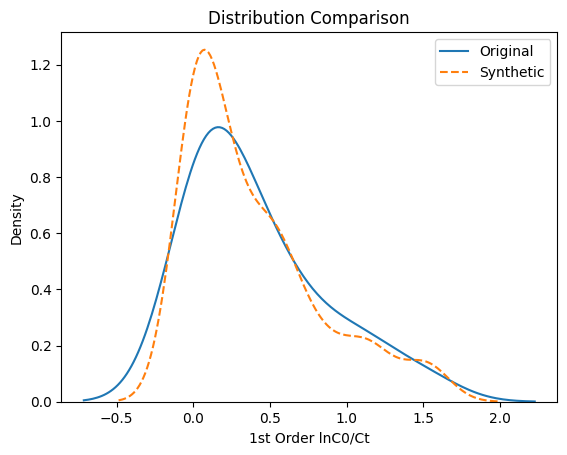

In [9]:
sns.kdeplot(df['1st Order lnC0/Ct'], label='Original')
sns.kdeplot(synthetic_data['1st Order lnC0/Ct'], label='Synthetic', linestyle='--')
plt.legend()
plt.title('Distribution Comparison')
plt.show()

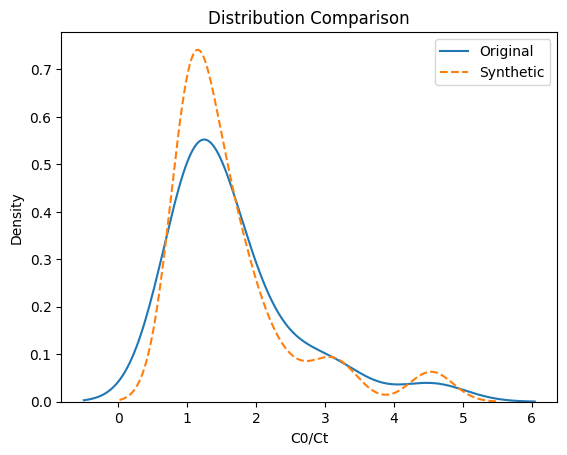

In [10]:
sns.kdeplot(df['C0/Ct'], label='Original')
sns.kdeplot(synthetic_data['C0/Ct'], label='Synthetic', linestyle='--')
plt.legend()
plt.title('Distribution Comparison')
plt.show()